In [57]:
%run methods.ipynb

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
#Republicanos Donald Trump
list_of_files =['../FicherosJSON//P1TheDemocrats_10000.json']
#Un unico dataframe
df = join_all_files_in_one_df(list_of_files)

In [59]:
dataFrames = df[1] 

In [60]:
#DataFrame y numero de tweets deseados 0 para todos los tweets
data = clean_data_from_json(dataFrames[0], 0)

In [61]:
 # return [cleanData, df, numeros_list, popularidad_list, len(numero)]
dataClearData = data[0]
dataDf = data[1]

In [62]:
numeros_list = data[2]
popularidad_list = data[3]
numero = data[4]
print(numero)

10000


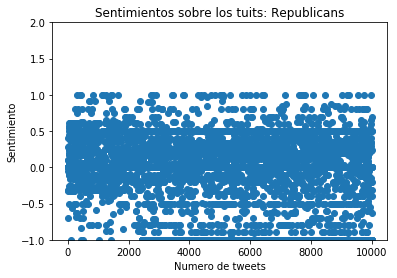

In [66]:
#Dibujar grafica Sentimental
GraficarDatos(numeros_list, popularidad_list, numero, "Sentimientos sobre los tuits: Republicans")

In [15]:
#REALIZAR PARA TODOS
#CREA UN GRAFO DIRIGIDO
#
graph = relaciones_network(dataDf)

numNodes = len(graph.node())
numEdges = len(graph.edges())
#list(nx.chain_decomposition(graph))

In [16]:
sentimentGraphNode = updateSentimentNode(graph)
#print(sentimentGraphNode.node(data=True))

In [9]:
nx.write_graphml(sentimentGraphNode, "theDemocrat.graphml")

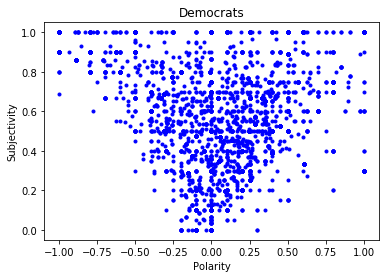

In [5]:
plt.plot(data[5],data[6],'.b')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Democrats')
plt.show()

In [20]:
#PRUEBAS con write_graphml
G = nx.path_graph(3)
print(G.nodes(data=True))

pos = nx.spring_layout(G)
print(pos)   
#nx.write_graphml(G, "g.graphml")

[(0, {}), (1, {}), (2, {})]
{0: array([0.3780497 , 0.99967592]), 1: array([0.00012256, 0.00032408]), 2: array([-0.37817225, -1.        ])}


In [16]:
#Republicans
print(numNodes)
print(numEdges)

20746
47985


In [15]:
#Republicans ASSORTATIVITY
r=nx.degree_assortativity_coefficient(graph)

d=nx.average_neighbor_degree(graph, source='in', target='in')

print(r)
print ('\n')

-0.2841030781317649




In [1]:
#Degree GLOBAL
degreeEachNode=nx.degree(graph)
x = []
for lista, listb in degreeEachNode:
    x.append(listb)
    
#IN-DEGREE
degreeEachNode = nx.in_degree_centrality(graph)
x = degreeEachNode.values()

y = d.values()
plt.loglog(x,y,'.')
plt.xlabel("Grado centralizado de entrada")
plt.show()

#OUT-DEGREE
degreeEachNode = nx.out_degree_centrality(graph)

x = degreeEachNode.values()
y = d.values()

plt.loglog(x,y,'.')
plt.xlabel("Grado centralizado de salida")
plt.show()




NameError: name 'nx' is not defined

In [ ]:
bb = nx.edge_betweenness_centrality(graph, normalized=False)
nx.set_edge_attributes(graph, bb, 'betweenness')


In [ ]:
edges,weights = zip(*nx.get_edge_attributes(graph,'betweenness').items())
pos = nx.spring_layout(graph)
nx.draw(graph, pos, node_color='b', node_size=10 ,edgelist=edges, edge_color=weights, width=2.0, edge_cmap=plt.cm.RdYlGn, with_labels = False)
#nx.write_graphml(graph, "betweenness.graphml", prettyprint=True)

In [ ]:
#Republicans DENSITY
nx.density(graph)

In [ ]:
graph.remove_edges_from(nx.selfloop_edges(graph))
graph = nx.k_core(graph,k=5)

graph = graph.to_undirected()
spring_pos = nx.spring_layout(graph)
edges,weights = zip(*nx.get_edge_attributes(graph,'sentiment').items())

In [ ]:
for node,(x,y) in spring_pos.items():
    graph.node[node]['x'] = float(x)
    graph.node[node]['y'] = float(y)
    

In [ ]:

#pos = nx.spring_layout(graph)
#plt.axis("off")
plt.figure(figsize=(30,30))
spring_pos = nx.spring_layout(graph)
size_node = [val for (node, val) in graph.degree()]
#nx.draw(graph, pos, node_color=sentimentNode, node_size=500 ,edgelist=edges, edge_color='b', width=2.0, edge_cmap=plt.cm.RdYlGn, with_labels = True)
nx.draw_networkx(graph, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color ='r', node_size = size_node, edge_color=weights, edgelist=edges, with_labels = True)
#plt.savefig("graphRepublicsEnlaces.png", dpi=1000)
nx.write_graphml(graph, "semtimentRepublicans.graphml", prettyprint=True)


In [17]:
#Comunidades 
graph = graph.to_undirected()
c = list(greedy_modularity_communities(graph))

In [18]:
cadaComunidad = []
numeroDeComunidades = 0
listaDeComunidades = []
dataCadaComunLda=[]
for comunity in c:
    dataParaLDA = []
    sentComunity = [] 
    laComidad = comunity
    for namePerson in laComidad:
        row = df.loc[df['screen_name'] == namePerson]
        tuitLimpio = tweet_clean(row['text'])
        sentComunity.append(sentimentalAnalis(tuitLimpio))
        dataParaLDA.append(tuitLimpio)
    dataCadaComunLda.append(dataParaLDA)
    numeroDeComunidades +=1
    listaDeComunidades.append(numeroDeComunidades)
    cadaComunidad.append(sum(sentComunity)/len(sentComunity))
    
numeroDeComunidades = len(cadaComunidad)
GraficarDatos(listaDeComunidades, cadaComunidad, numeroDeComunidades, "Sentimientos sobre las comunidades en Republics")
    
        

AttributeError: 'list' object has no attribute 'loc'

In [ ]:
len(dataCadaComunLda)

In [19]:
resultData = dict()
varCont = 0
for eachdata in dataCadaComunLda:
    resultData[varCont] = ldaMethod(eachdata, 15)
    varCont +=1
    


In [56]:
len(graph.nodes)


5280

In [42]:
lda = ldaMethod(data[0], 15)

In [43]:
c =  lda[1]
d = lda[2]
mlda =  lda[3]
pyLDAvis.gensim.prepare(mlda, c, d)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.259430  0.275970  1       1        21.228664
0      0.337675 -0.300882  2       1        17.131975
6      0.061882  0.124472  3       1        6.799205 
8     -0.122057 -0.049999  4       1        6.263638 
1     -0.163360 -0.050442  5       1        5.770102 
13    -0.010110  0.046794  6       1        5.274562 
12     0.100136 -0.093735  7       1        4.995257 
3     -0.153325 -0.108931  8       1        4.966377 
11     0.007984  0.145501  9       1        4.749119 
14    -0.076694  0.048324  10      1        4.737340 
5     -0.098964  0.063769  11      1        4.231135 
2     -0.030187 -0.023976  12      1        4.016381 
9      0.037420  0.021849  13      1        3.905103 
4     -0.092720 -0.078447  14      1        3.683251 
10    -0.057110 -0.020268  15      1        2.247879 , topic_info=     Category        Freq         Term       Total  loglift  logprob
term                                                                
46    Default  906.000000  peopleâ      906.000000  30.0000  30.0000
780   Default  837.000000  ago          837.000000  29.0000  29.0000
228   Default  814.000000  honor        814.000000  28.0000  28.0000
2168  Default  825.000000  anniversari  825.000000  27.0000  27.0000
906   Default  798.000000  year         798.000000  26.0000  26.0000
295   Default  789.000000  rememb       789.000000  25.0000  25.0000
354   Default  781.000000  day          781.000000  24.0000  24.0000
2043  Default  781.000000  earthquak    781.000000  23.0000  23.0000
2169  Default  772.000000  devast       772.000000  22.0000  22.0000
2171  Default  766.000000  tragedi      766.000000  21.0000  21.0000
2170  Default  764.000000  resili       764.000000  20.0000  20.0000
18    Default  732.000000  racist       732.000000  19.0000  19.0000
15    Default  641.000000  hate         641.000000  18.0000  18.0000
20    Default  625.000000  take         625.000000  17.0000  17.0000
21    Default  620.000000  talk         620.000000  16.0000  16.0000
19    Default  742.000000  senat        742.000000  15.0000  15.0000
25    Default  604.000000  watch        604.000000  14.0000  14.0000
14    Default  585.000000  donald       585.000000  13.0000  13.0000
16    Default  580.000000  languag      580.000000  12.0000  12.0000
26    Default  574.000000  yesterday    574.000000  11.0000  11.0000
24    Default  640.000000  use          640.000000  10.0000  10.0000
17    Default  573.000000  minut        573.000000  9.0000   9.0000 
22    Default  573.000000  three        573.000000  8.0000   8.0000 
23    Default  830.000000  trump        830.000000  7.0000   7.0000 
723   Default  179.000000  hillari      179.000000  6.0000   6.0000 
84    Default  196.000000  â            196.000000  5.0000   5.0000 
362   Default  334.000000  haiti        334.000000  4.0000   4.0000 
35    Default  377.000000  call         377.000000  3.0000   3.0000 
10    Default  185.000000  peopl        185.000000  2.0000   2.0000 
176   Default  211.000000  money        211.000000  1.0000   1.0000 
...       ...         ...    ...               ...     ...      ... 
1001  Topic15  6.539683    break        7.402299    3.6713  -4.9273 
1652  Topic15  6.103930    retweet      6.966547    3.6630  -4.9963 
455   Topic15  5.952926    bring        6.815542    3.6599  -5.0213 
70    Topic15  5.682415    spew         6.545031    3.6539  -5.0678 
784   Topic15  5.682415    brought      6.545032    3.6539  -5.0678 
1247  Topic15  5.517169    especi       6.379791    3.6499  -5.0973 
203   Topic15  5.186694    cut          6.049310    3.6413  -5.1591 
520   Topic15  5.021453    russia       5.884070    3.6367  -5.1915 
1653  Topic15  4.750942    traffick     5.613559    3.6283  -5.2469 
1000  Topic15  4.329426    confus       5.192043    3.6135  -5.3398 
1878  Topic15  4.149950    sourc        5.012566    3.6063  -5.3821 
989